In [177]:
import idx2numpy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [178]:
train_images_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\train-images.idx3-ubyte"
train_labels_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\train-labels.idx1-ubyte"

test_images_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\t10k-images.idx3-ubyte"
test_labels_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\t10k-labels.idx1-ubyte"

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
x_train = idx2numpy.convert_from_file(train_images_path)
x_train = (torch.tensor(x_train,dtype=torch.float32).reshape(len(x_train),784)/255).to(device)
print(x_train.shape)

y_train = idx2numpy.convert_from_file(train_labels_path)
y_train=torch.tensor(y_train,dtype=torch.float32).to(device)
print(y_train)



cuda
torch.Size([60000, 784])
tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')


In [179]:

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(10, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layer(x)


In [180]:
model=NN().to(device)
y_ohc=torch.nn.functional.one_hot(y_train.to(torch.int64),num_classes=10).float().to(device)
batchs=32
epochs=30

model.train()

l=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

for i in range(epochs):
    total_loss=0
    for a in range(0,len(x_train),batchs):
        optimizer.zero_grad()
        loop_X=y_ohc[a:a+batchs]
        loop_Y=x_train[a:a+batchs]
        output=model(loop_X)
        loss=l(output,loop_Y)
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
    print(f"epoch={i+1},Total_loss={total_loss}")



epoch=1,Total_loss=104.46426162496209
epoch=2,Total_loss=102.45181082189083
epoch=3,Total_loss=102.27181648463011
epoch=4,Total_loss=102.1865770407021
epoch=5,Total_loss=102.22416228801012
epoch=6,Total_loss=102.15585755929351
epoch=7,Total_loss=102.15139512717724
epoch=8,Total_loss=102.24968805164099
epoch=9,Total_loss=102.18618370592594
epoch=10,Total_loss=102.16942574828863
epoch=11,Total_loss=102.22594363614917
epoch=12,Total_loss=102.20069924741983
epoch=13,Total_loss=102.14741034805775
epoch=14,Total_loss=102.13531638681889
epoch=15,Total_loss=102.15995438024402
epoch=16,Total_loss=102.18618331849575
epoch=17,Total_loss=102.26677243411541
epoch=18,Total_loss=102.26228849589825
epoch=19,Total_loss=102.2187922373414
epoch=20,Total_loss=102.18277601897717
epoch=21,Total_loss=102.17091544345021
epoch=22,Total_loss=102.18742595985532
epoch=23,Total_loss=102.22004258260131
epoch=24,Total_loss=102.33528923988342
epoch=25,Total_loss=102.44700780883431
epoch=26,Total_loss=102.377463214099

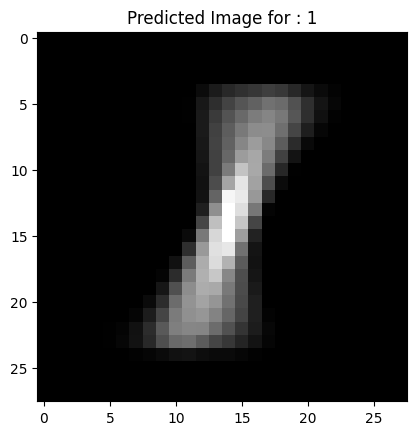

In [217]:
model.eval()
input=1
z=torch.zeros(10)
z[input] = 1
z=z.to(device).float().unsqueeze(0)
with torch.no_grad():
    plt.imshow(model(z).cpu().numpy().reshape(28,28).squeeze(),cmap="gray")
    plt.title(f"Predicted Image for : {input}")
    plt.show()